## Homework2 Machine Learning Lab
Jialong Feng

# 1.) Pull in Data and Convert ot Monthly

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


In [8]:
df

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842
...,...,...,...,...
2023-09-30,170.984741,-0.439423,-1.0,13.678779
2023-10-31,170.545319,19.404678,1.0,13.643625
2023-11-30,189.949997,2.580002,1.0,15.196000


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [9]:
df['Diff'] = df['Adj Close'].diff().shift(-1)
df['Target'] = np.sign(df['Diff'])
df['Premium'] = 0.08 * df['Adj Close']
df

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842
...,...,...,...,...
2023-09-30,170.984741,-0.439423,-1.0,13.678779
2023-10-31,170.545319,19.404678,1.0,13.643625
2023-11-30,189.949997,2.580002,1.0,15.196000


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import requests
import io

In [16]:

data_link = "https://raw.githubusercontent.com/BACCHUS2333/stock_portfolio.github.io/main/Xdata.csv"
s=requests.get(data_link).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')),index_col="Date", 
                parse_dates=["Date"])

X = data

In [17]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:'2023-09-30', :].copy()

In [18]:
# Fit a log regression
logreg = LogisticRegression().fit(X, y)

# 4.) Add columns, prediction and profits.

In [19]:
y_pred = logreg.predict(X)
df['Predictions'] = y_pred
df['Profits'] = 0.

In [20]:
# True Positive Profits
df.loc[(df['Target'] == 1) & (df['Predictions'] == 1), 'Profits'] = df['Premium']

#False Positive
df.loc[(df['Target'] == -1) & (df['Predictions'] == 1), 'Profits'] = -100 * df['Premium']
df.head()

,Adj Close,Diff,Target,Premium,Predictions,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842


In [37]:
df.iloc[5:6,1]

Date
1981-05-31   -0.024614
Freq: M, Name: Diff, dtype: float64

# 5.) Plot profits over time

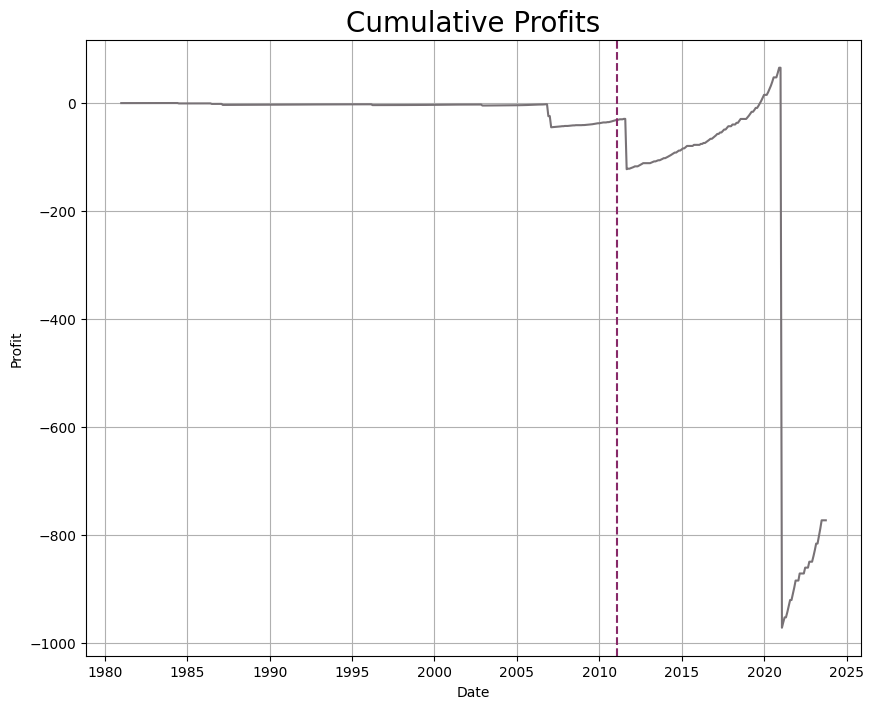

In [49]:
plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(df['Profits']),color = '#787276')
#add a vertical line at x = 2000-01-31
plt.axvline(x = 15000, color='#872968', linestyle='--')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Cumulative Profits',fontsize=20)
plt.show()

## 5.1 5.5) Short write up about how you see your skills valuable to PJ and/or Philip Liu


> My knowledge in financial modelling could contribute to the development of the platform by adopting other algorithms to identify premium and decide threshold.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.